In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import string
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Load the Datasets**

In [ ]:
d_fake=pd.read_csv("/content/drive/MyDrive/Fake.csv")
d_true=pd.read_csv("/content/drive/MyDrive/True.csv")

# **Viewing Data**

In [ ]:
d_fake["class"]=0
d_true['class']=1

In [ ]:
d_fake.shape, d_true.shape

((23481, 5), (21417, 5))

In [ ]:
d_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
d_true.tail()

,title,text,subject,date,class
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
d_fake.shape, d_true.shape

((23481, 5), (21417, 5))

In [ ]:
data_merge=pd.concat([d_fake, d_true], axis = 0)

**top columns are not required for detecting the fake news**

In [ ]:
data=data_merge.drop(['title','subject','date'], axis = 1)

In [ ]:
data=data.sample(frac=1)

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.head()

,index,text,class
0,15272,FRANKFURT (Reuters) - A German nurse serving a...,1
1,11215,WASHINGTON (Reuters) - The White House has rec...,1
2,14976,And why Obama may be better off with a Republi...,0
3,18584,Former CIA Agent Phil Mudd is a jackwagon! He ...,0
4,2458,If there is anything that really gets under Do...,0


In [ ]:
data.drop(['index'],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

,0
text,0
class,0


## **Data Preproceesing**

In [ ]:
def clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [ ]:
data['text'] = data['text'].apply(clean)

**Tokenize**

make a column of tokenized text

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
data['tokenized_text'] = data['text'].apply(word_tokenize)

**Stopword removal**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [ ]:
data.head(10)

,text,class,tokenized_text
0,frankfurt reuters a german nurse serving a...,1,"[frankfurt, reuters, german, nurse, serving, p..."
1,washington reuters the white house has rec...,1,"[washington, reuters, white, house, received, ..."
2,and why obama may be better off with a republi...,0,"[obama, may, better, republican, president, ed..."
3,former cia agent phil mudd is a jackwagon he ...,0,"[former, cia, agent, phil, mudd, jackwagon, th..."
4,if there is anything that really gets under do...,0,"[anything, really, gets, donald, trump, skin, ..."
5,manila reuters the philippines has assured...,1,"[manila, reuters, philippines, assured, vietna..."
6,this could be bad news for a number of politic...,0,"[could, bad, news, number, politicians, seem, ..."
7,donald trump has made a lot of offensive state...,0,"[donald, trump, made, lot, offensive, statemen..."
8,war on christmas update some very clever peop...,0,"[war, christmas, update, clever, people, askin..."
9,president trump greeted the nhl s stanley cup ...,0,"[president, trump, greeted, nhl, stanley, cup,..."


**Stemming**

In [ ]:
stemmer = PorterStemmer()
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
data.head(10)

,text,class,tokenized_text
0,frankfurt reuters a german nurse serving a...,1,"[frankfurt, reuter, german, nurs, serv, prison..."
1,washington reuters the white house has rec...,1,"[washington, reuter, white, hous, receiv, upda..."
2,and why obama may be better off with a republi...,0,"[obama, may, better, republican, presid, edwar..."
3,former cia agent phil mudd is a jackwagon he ...,0,"[former, cia, agent, phil, mudd, jackwagon, th..."
4,if there is anything that really gets under do...,0,"[anyth, realli, get, donald, trump, skin, peop..."
5,manila reuters the philippines has assured...,1,"[manila, reuter, philippin, assur, vietnam, fa..."
6,this could be bad news for a number of politic...,0,"[could, bad, news, number, politician, seem, d..."
7,donald trump has made a lot of offensive state...,0,"[donald, trump, made, lot, offens, statement, ..."
8,war on christmas update some very clever peop...,0,"[war, christma, updat, clever, peopl, ask, joi..."
9,president trump greeted the nhl s stanley cup ...,0,"[presid, trump, greet, nhl, stanley, cup, win,..."


In [ ]:
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))
data['char_count'] = data['text'].apply(lambda x: len(str(x)))
data['avg_word_length'] = data['char_count'] / data['word_count']

In [ ]:
data.head(5)

,text,class,tokenized_text,word_count,char_count,avg_word_length
0,frankfurt reuters a german nurse serving a...,1,"[frankfurt, reuter, german, nurs, serv, prison...",331,1917,5.791541
1,washington reuters the white house has rec...,1,"[washington, reuter, white, hous, receiv, upda...",419,2550,6.085919
2,and why obama may be better off with a republi...,0,"[obama, may, better, republican, presid, edwar...",656,3404,5.189024
3,former cia agent phil mudd is a jackwagon he ...,0,"[former, cia, agent, phil, mudd, jackwagon, th...",332,1953,5.882530
4,if there is anything that really gets under do...,0,"[anyth, realli, get, donald, trump, skin, peop...",397,2268,5.712846


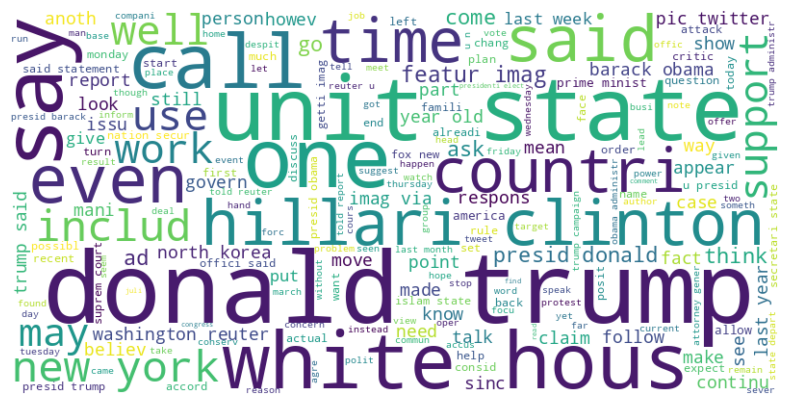

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokenized and stemmed words into one string
text = ' '.join([' '.join(words) for words in data['tokenized_text']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: xlabel='class', ylabel='count'>

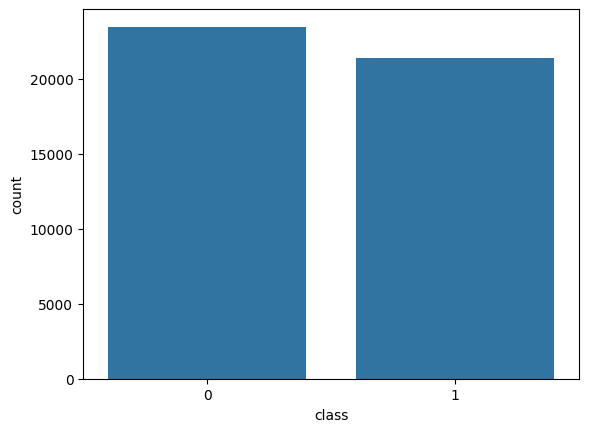

In [ ]:
import seaborn as sns
sns.countplot(data=data,
              x='class',
              order=data['class'].value_counts().index)

# **Labeling and Splitting test and training data**

In [ ]:
from sklearn.model_selection import train_test_split

X = data['text']
y = data['class']

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

# Train models
rf_clf.fit(X_train, y_train)
et_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

# **Ensemble Model**

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create an ensemble model with voting
ensemble_model = VotingClassifier(estimators=[
    ('RandomForest', rf_clf),
    ('ExtraTrees', et_clf),
    ('DecisionTree', dt_clf)
], voting='hard')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(random_state=42)),
                             ('ExtraTrees',
                              ExtraTreesClassifier(random_state=42)),
                             ('DecisionTree',
                              DecisionTreeClassifier(random_state=42))])

# **Prediction and Evaluation**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = ensemble_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9971046770601336
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



# **Confusion Matrix**

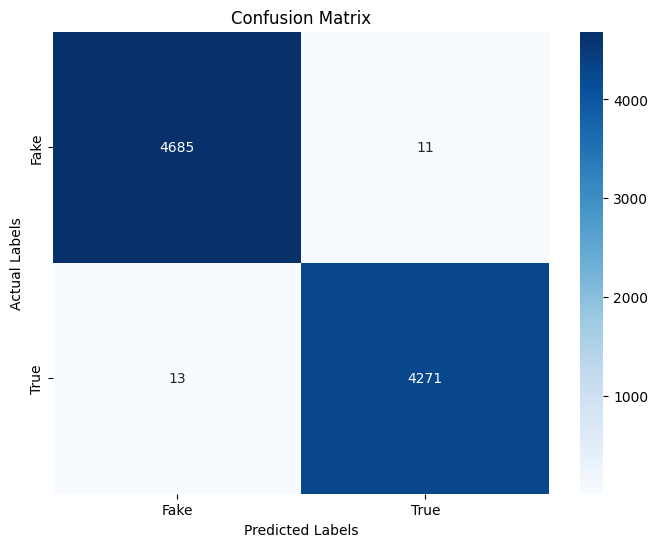

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()